In [16]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Sample feedback templates
positive_feedback = [
    "I love the community events and activities.",
    "The study spaces are quiet and comfortable.",
    "Maintenance responds quickly to issues.",
    "Wi-Fi has been great lately, no complaints.",
    "Staff are friendly and always helpful.",
    "Laundry services are reliable and convenient.",
    "Common areas are always clean and well-kept.",
    "Room was clean and move-in process was smooth.",
    "Security is excellent, I feel very safe.",
    "App for room booking works flawlessly."
]

neutral_feedback = [
    "Room is okay, nothing special.",
    "Wi-Fi works most of the time.",
    "The food is average, could be better.",
    "Laundry machines are sometimes occupied.",
    "Occasional noise from hallways.",
    "Common areas are alright.",
    "Reception staff are sometimes helpful.",
    "Lighting in the corridors is dim.",
    "Not much to say, it's fine.",
    "Air conditioning works, but takes time."
]

negative_feedback = [
    "Wi-Fi is terrible, keeps disconnecting.",
    "Maintenance takes forever to respond.",
    "Room was dirty when I moved in.",
    "Too noisy at night, can’t sleep.",
    "Air conditioning doesn't work properly.",
    "Security staff are rude.",
    "Laundry machines are often broken.",
    "Booking system is confusing and buggy.",
    "Common areas are dirty most of the time.",
    "No hot water in the showers."
]

# Generate simulated data
def generate_feedback_data(num_entries=200):
    feedback_data = []
    start_date = datetime.strptime("2025-05-01", "%Y-%m-%d")

    for i in range(num_entries):
        resident_id = f"R{str(i+1).zfill(3)}"
        sentiment_group = random.choices(
            ["positive", "neutral", "negative"],
            weights=[0.45, 0.25, 0.3],
            k=1
        )[0]

        if sentiment_group == "positive":
            feedback = random.choice(positive_feedback)
        elif sentiment_group == "neutral":
            feedback = random.choice(neutral_feedback)
        else:
            feedback = random.choice(negative_feedback)

        feedback_date = start_date + timedelta(days=random.randint(0, 60))

        feedback_data.append({
            "ResidentID": resident_id,
            "Feedback": feedback,
            "Date": feedback_date.strftime("%Y-%m-%d")
        })

    return pd.DataFrame(feedback_data)

# Generate and display the dataset
df = generate_feedback_data(200)
print(df.head())

# Optionally export to Excel
df.to_excel("resident_feedback_data.xlsx", index=False)


  ResidentID                                  Feedback        Date
0       R001           Occasional noise from hallways.  2025-05-28
1       R002    Staff are friendly and always helpful.  2025-06-29
2       R003              No hot water in the showers.  2025-05-11
3       R004               Not much to say, it's fine.  2025-06-14
4       R005  Common areas are dirty most of the time.  2025-05-20


In [2]:
%pip install pandas textblob matplotlib seaborn wordcloud openpyxl


Perform Sentiment Analysis

In [17]:
from textblob import TextBlob

# Lowercase feedback for consistency
df['Cleaned_Feedback'] = df['Feedback'].str.lower()

# Sentiment scoring using TextBlob
df['Sentiment_Score'] = df['Cleaned_Feedback'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Label sentiment
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(label_sentiment)


Visualize Sentiment Distribution

/tmp/ipython-input-18-4248811646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette="viridis")


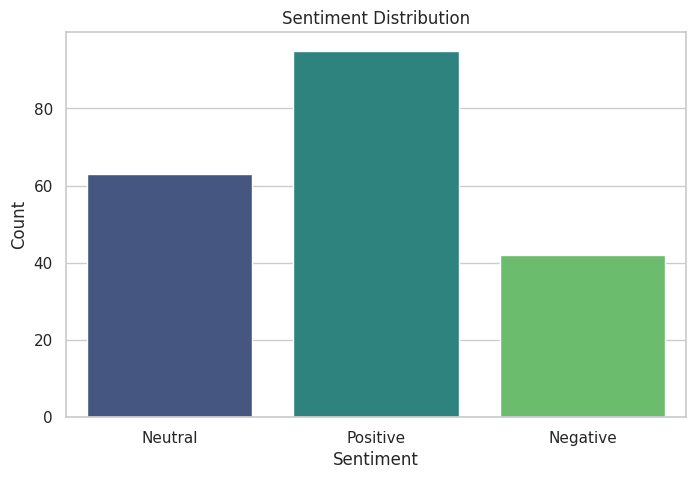

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Label', data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Time-Based Sentiment Trend

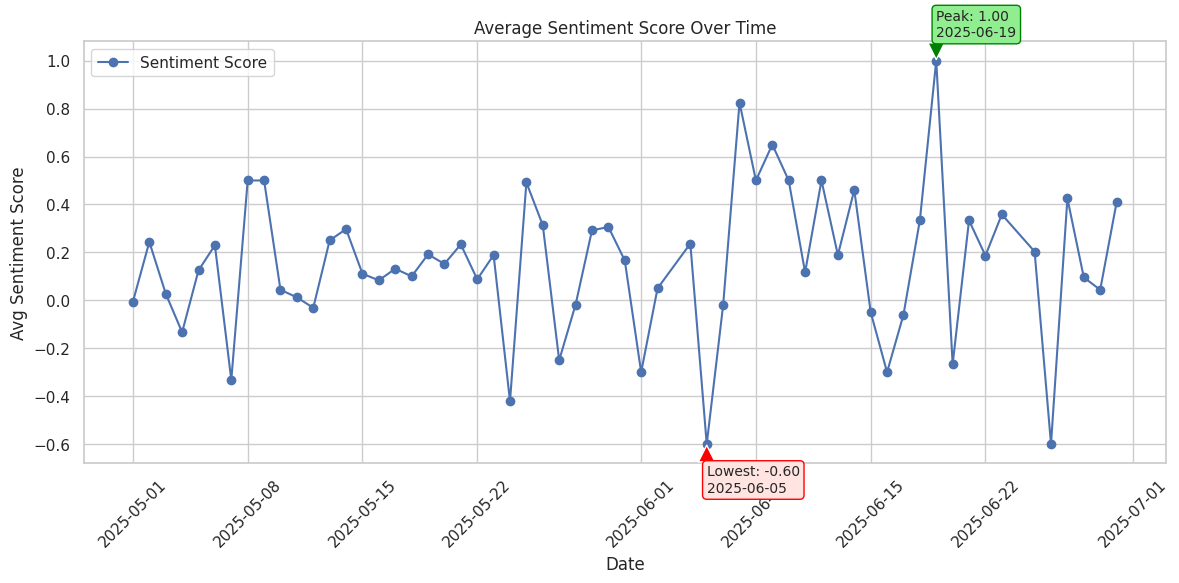

In [19]:
import matplotlib.pyplot as plt

# Group by date and average sentiment
df['Date'] = pd.to_datetime(df['Date'])
daily_sentiment = df.groupby(df['Date'].dt.date)['Sentiment_Score'].mean()

# Find max and min sentiment values
max_date = daily_sentiment.idxmax()
max_value = daily_sentiment.max()

min_date = daily_sentiment.idxmin()
min_value = daily_sentiment.min()

# Plotting the sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', label="Sentiment Score")

# Add annotation for max point
plt.annotate(
    f'Peak: {max_value:.2f}\n{max_date}',
    xy=(max_date, max_value),
    xytext=(max_date, max_value + 0.1),
    arrowprops=dict(facecolor='green', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='lightgreen')
)

# Add annotation for min point
plt.annotate(
    f'Lowest: {min_value:.2f}\n{min_date}',
    xy=(min_date, min_value),
    xytext=(min_date, min_value - 0.2),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='mistyrose')
)

# Formatting
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Word Clouds by Sentiment

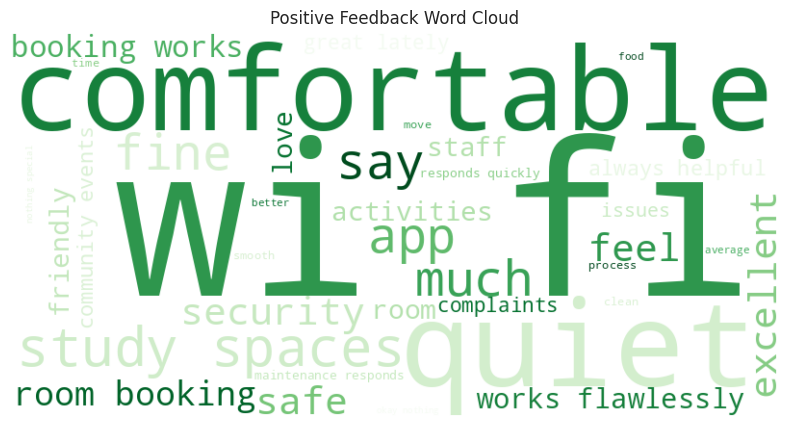

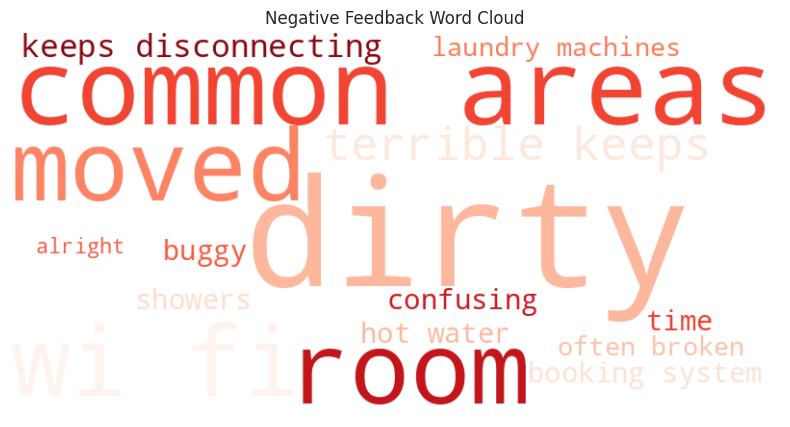

In [20]:
from wordcloud import WordCloud

# Join feedback text by sentiment
positive_text = " ".join(df[df['Sentiment_Label'] == "Positive"]['Cleaned_Feedback'])
negative_text = " ".join(df[df['Sentiment_Label'] == "Negative"]['Cleaned_Feedback'])

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Feedback Word Cloud")
plt.show()

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Feedback Word Cloud")
plt.show()


Sentiment Counts & Percentages

In [21]:
# Count of each sentiment
sentiment_counts = df['Sentiment_Label'].value_counts()
sentiment_percentages = round(df['Sentiment_Label'].value_counts(normalize=True) * 100, 1)

summary_df = pd.DataFrame({
    "Count": sentiment_counts,
    "Percentage": sentiment_percentages
})

summary_df.index.name = "Sentiment"
summary_df.reset_index(inplace=True)
summary_df


,Sentiment,Count,Percentage
0,Positive,95,47.5
1,Neutral,63,31.5
2,Negative,42,21.0


Average Sentiment Score

In [22]:
avg_score = df['Sentiment_Score'].mean().round(3)
print(f"📊 Average Sentiment Score: {avg_score}")


📊 Average Sentiment Score: 0.129
